## Reading In The Data

In [2]:
# importing ligraries
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-talk') #sets the size of the charts
style.use('ggplot')

In [4]:
import seaborn as sns

In [5]:
# setting dataframe
df = pd.read_csv('data/AdSmartABdata.csv')

In [6]:
pd.set_option('max_row', None)

In [7]:
# checking head
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [8]:
# checking the shape
df.shape

(8077, 9)

There are 8077 rows and 9 columns in the dataset.

The dataset contains the yes and no columns. A 1 in one the columns indicates it was selected, and a 0 indicates it wasn't.
A 0 in both indicates the user ignored the questionner.
Users who answered and wether they answered yes or no is most important therefore all rows with 0 in both yes/no columns will be dropped

In [9]:
drop = df.loc[(df['yes']==0) & (df['no']==0)]
drop.shape

(6834, 9)

6834 users in the dataset did not answer the questioner so they will be dropped.

In [10]:
df.drop(drop.index, axis=0,inplace=True)
df.shape

(1243, 9)

After dropping users who did not answer we have 1243 enteries left.

We will now create a new column "answer" where 0 indicates no and 1 indicates yes then drop the yes & no columns

In [12]:
# creating answer column
df['answer'] = df['yes']

# dropping yes and no columns
df.drop(['yes','no'], axis=1, inplace=True)

# checking dataframe
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,answer
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0


In [13]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 2 to 8071
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   1243 non-null   object
 1   experiment   1243 non-null   object
 2   date         1243 non-null   object
 3   hour         1243 non-null   int64 
 4   device_make  1243 non-null   object
 5   platform_os  1243 non-null   int64 
 6   browser      1243 non-null   object
 7   answer       1243 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 87.4+ KB


In [14]:
# converting date column to datetime
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 2 to 8071
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   1243 non-null   object        
 1   experiment   1243 non-null   object        
 2   date         1243 non-null   datetime64[ns]
 3   hour         1243 non-null   int64         
 4   device_make  1243 non-null   object        
 5   platform_os  1243 non-null   int64         
 6   browser      1243 non-null   object        
 7   answer       1243 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 87.4+ KB


## Counting unique values

In [16]:
# checking count of unique values in experiment column
df.groupby('experiment')[['auction_id']].count()

,auction_id
experiment,
control,586
exposed,657


There are 586 users in the control group and 657 users in the exposed group.

In [17]:
# checking count of unique values in date column
df.groupby('date')[['auction_id']].count().sort_values(by='auction_id', ascending=False)

,auction_id
date,
2020-07-03,325
2020-07-09,184
2020-07-08,177
2020-07-04,159
2020-07-10,124
2020-07-05,117
2020-07-07,83
2020-07-06,74


Most replies were made on July 3rd

In [18]:
# checking count of unique values in hour column
df.groupby('hour')[['auction_id']].count().sort_values(by='auction_id', ascending=False)

,auction_id
hour,
15,281
8,67
7,59
10,57
9,57
14,51
6,50
5,49
4,46


The users are most active from early morning hours to afternoon hours (6-11 to 12-16).
And least active at night (19-2).

In [19]:
# checking count of unique values in devive maker column
df.groupby('device_make')[['auction_id']].count().sort_values(by='auction_id', ascending=False)

,auction_id
device_make,
Generic Smartphone,719
Samsung SM-G960F,45
Samsung SM-G950F,35
Samsung SM-G973F,22
Samsung SM-A202F,18
iPhone,18
Samsung SM-G930F,16
Samsung SM-G975F,15
Samsung SM-A405FN,14


Most of the users had a Generic Smartphone or a Samsung phone.

In [20]:
# checking count of unique values in platform_os column
df.groupby('platform_os')[['auction_id']].count().sort_values(by='auction_id', ascending=False)

,auction_id
platform_os,
6,1226
5,17


Majority of users were on Platform Os 6

In [21]:
# checking count of unique values in browser column
df.groupby('browser')[['auction_id']].count().sort_values(by='auction_id', ascending=False)

,auction_id
browser,
Chrome Mobile,695
Chrome Mobile WebView,227
Facebook,156
Samsung Internet,145
Mobile Safari,14
Mobile Safari UI/WKWebView,3
Chrome,2
Chrome Mobile iOS,1


The most used browsers when ansering the questionner were Chrome Mobile, Chrome Mobile WebView, Facebook and Samsung Internet.

In [22]:
# checking count of unique values in answer column
df.groupby('answer')[['auction_id']].count().sort_values(by='auction_id', ascending=False)

,auction_id
answer,
0,671
1,572


There was overall more No (0) than Yes(1) in the replies.

## Plot Of Column Values

In [23]:
# helper function
def plot_bar(col):

    labels = df[col].unique()
    values = df[col].value_counts()
    
    plt.title(f'The distribution of values in {col} column')

    plt.xticks(rotation=80)

    plt.bar(labels,values)

    plt.show()

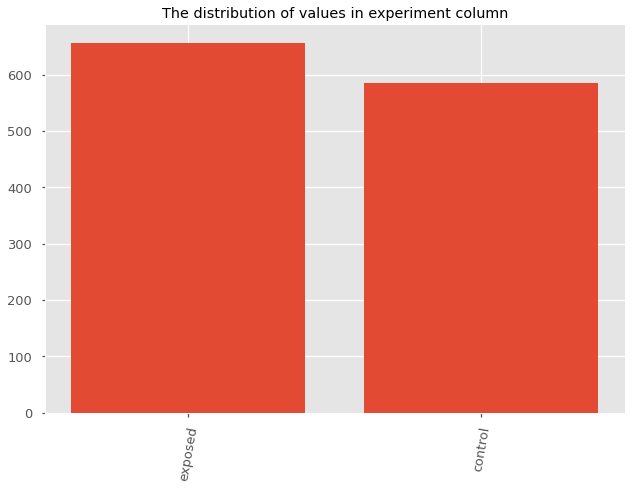

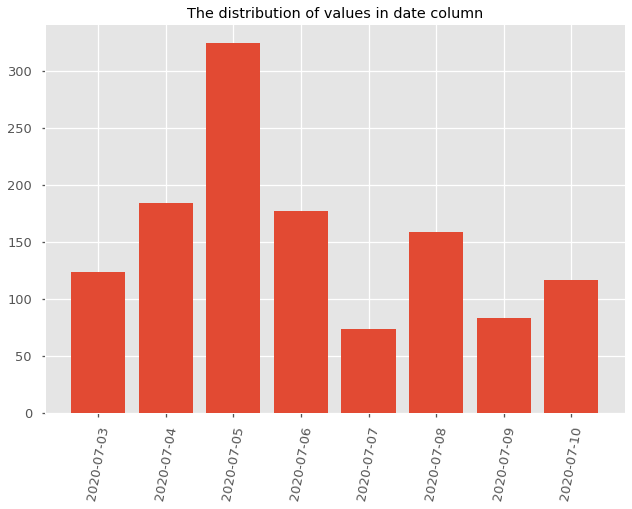

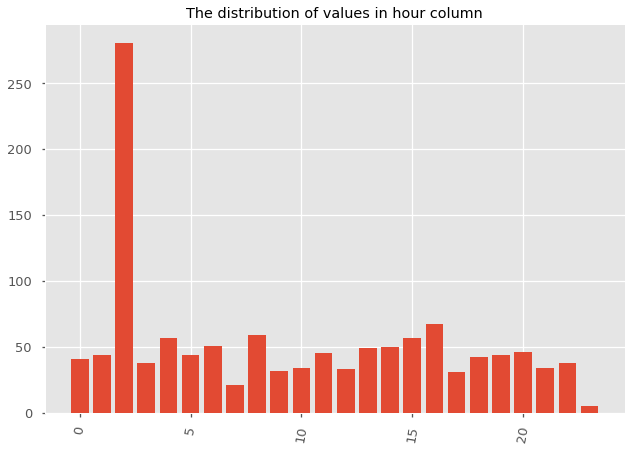

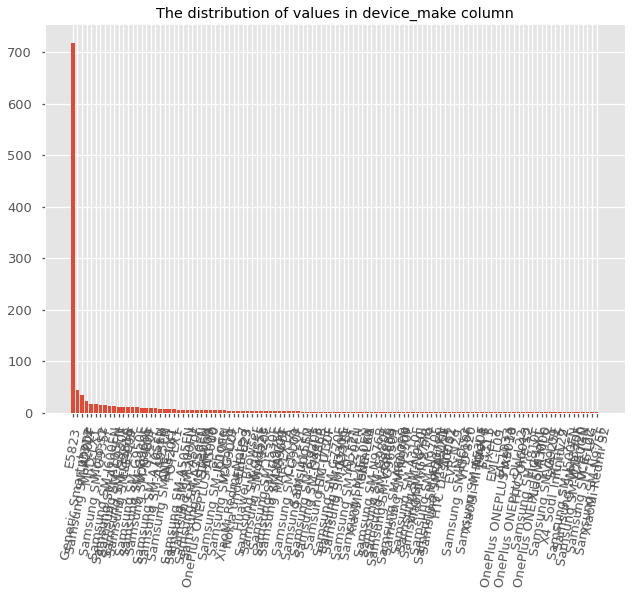

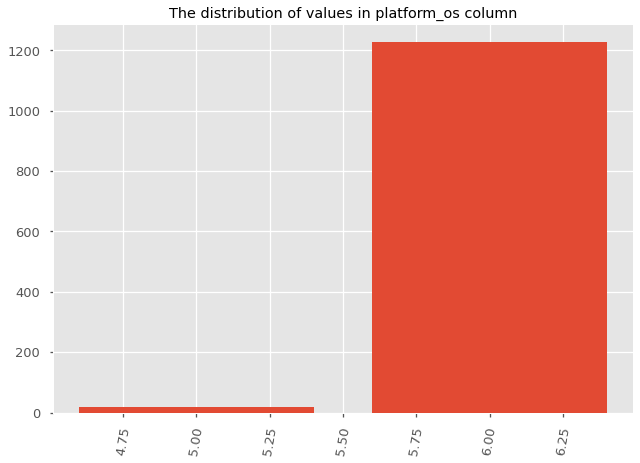

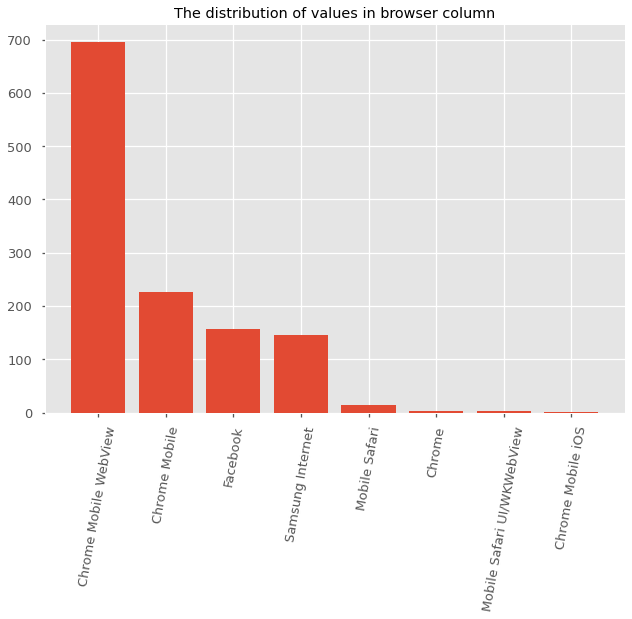

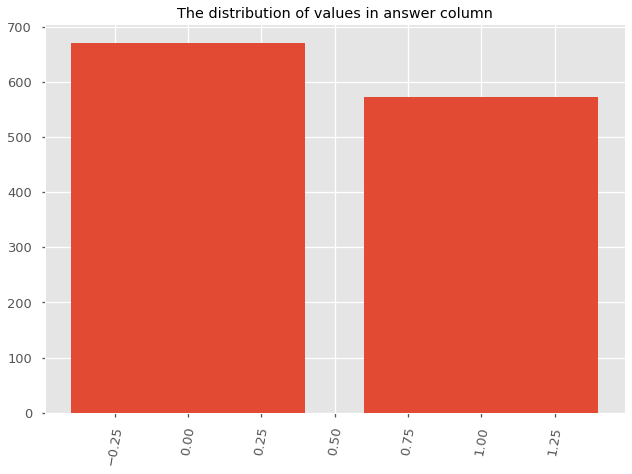

In [24]:
# plotting distribution of all column values
for i in df.columns[1:]:
    plot_bar(i)

## Sampling

In [25]:
# selecting a sample of the dataset for equal comparison
required_n = 400
control_sample = df[df['experiment'] == 'control'].sample(n=required_n, random_state=22)
exposed_sample = df[df['experiment'] == 'exposed'].sample(n=required_n, random_state=22)

ab_test = pd.concat([control_sample, exposed_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)

## Comparing statistics of groups

In [26]:
import scipy.stats as stats
conversion_rates = ab_test.groupby('experiment')['answer']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
experiment,,,
control,0.430,0.495,0.025
exposed,0.470,0.499,0.025



Judging by the stats above, it does look like our exposed group design performed similarly, with our new design performing slightly better, at 43% vs. 47% conversion rate.

Plotting the data will make these results easier to grasp:

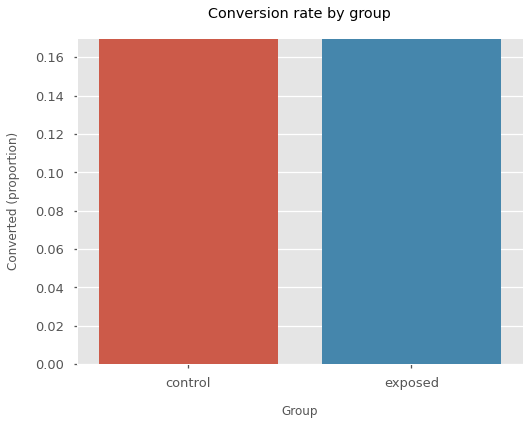

In [27]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['experiment'], y=ab_test['answer'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

## Hypothesis Testing

In [28]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [29]:
control_results = ab_test[ab_test['experiment'] == 'control']['answer']
exposed_results = ab_test[ab_test['experiment'] == 'exposed']['answer']

In [30]:
n_con = control_results.count()
n_treat = exposed_results.count()
successes = [control_results.sum(), exposed_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -1.14
p-value: 0.256
ci 95% for control group: [0.381, 0.479]
ci 95% for treatment group: [0.421, 0.519]


Since our $p$-value=0.256 is below our $\alpha$=0.05, we can reject the null hypothesis $H_0$, which means that the new design performed better than the old one